In [18]:
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import glob, os

writers_dic = {}
client_band_dic = {}
client_utils_dic = {}
osds_utils_dic = {}
for file in glob.glob("output_*.csv"):
    data = read_csv(file)
    datalen = len(data.values)
    client_band = []
    writers = []
    client_utils = []
    obj_size = data.values[0,0]
    row_len = len(data.values[0])
    osds_utils=[[] for _ in range(row_len-4)]
    for i in range(datalen):
        writers.append(data.values[i,1])
        client_utils.append(data.values[i,2])
        client_band.append(data.values[i,3])
        for j in range(4, row_len):
            osds_utils[j-4].append(data.values[i,j])
    
    client_band_dic[int(obj_size)] = client_band
    client_utils_dic[int(obj_size)] = client_utils
    osds_utils_dic[int(obj_size)] = osds_utils
    
    writers_dic[int(obj_size)] = [str(int(i)) for i in writers]
plt.close()


{1: ['4', '8', '12', '16', '20', '24', '28', '32'], 10: ['4', '8', '12', '16', '20', '24', '28', '32'], 100: ['4', '8', '12', '16', '20', '24', '28', '32']}
{1: [359.8074409898369, 647.8029401539608, 725.2475213137425, 779.7983308905734, 803.8075185416451, 759.9984378772114, 725.9803774715638, 716.7432042322586], 10: [379.5213596554248, 583.0302619629192, 751.7066993372572, 818.5857863484352, 821.6041158083582, 761.3624936086688, 738.1244031017695, 793.4416900282472], 100: [398.834585878065, 625.3670337996089, 695.1763196536591, 815.4649543285457, 704.9690024112841, 710.747312378445, 711.8266963819387, 686.2210512867172]}


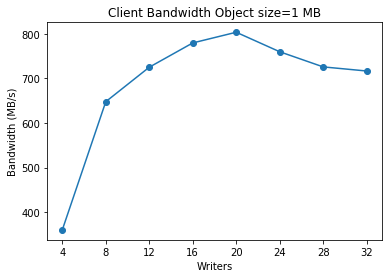

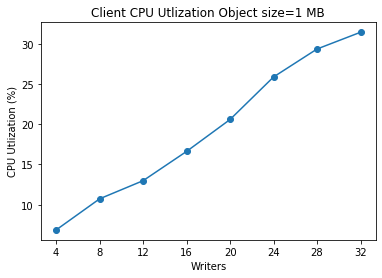

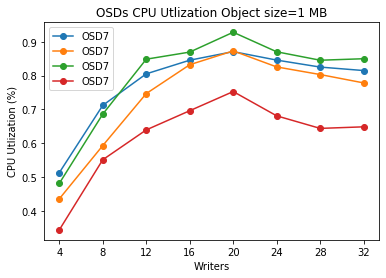

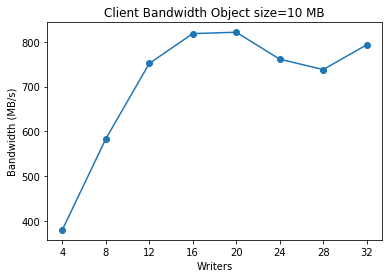

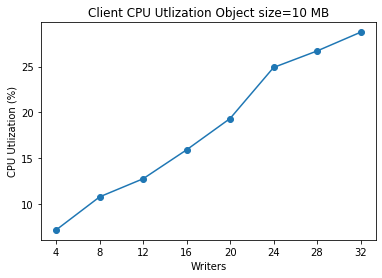

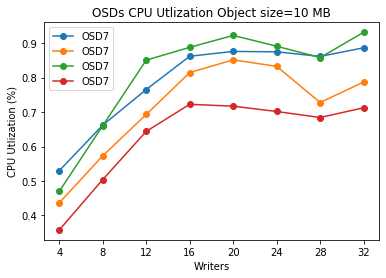

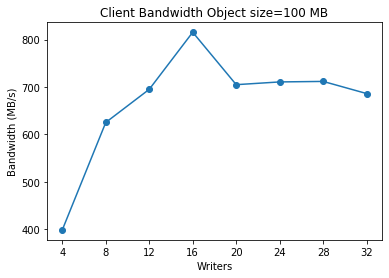

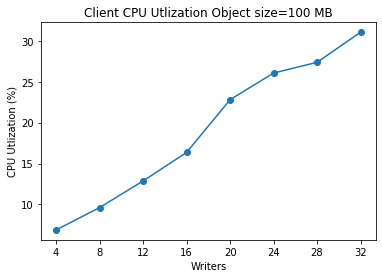

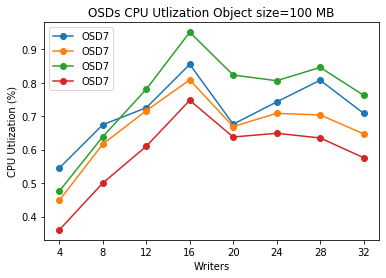

In [19]:
for obj_size in client_band_dic:
    plt.plot(writers_dic[obj_size], client_band_dic[obj_size], marker='o')
    plt.title('Client Bandwidth Object size='+str(obj_size)+' MB')
    plt.xlabel('Writers')
    plt.ylabel('Bandwidth (MB/s)')
    plt.show()

    plt.plot(writers_dic[obj_size], client_utils_dic[obj_size], marker='o')
    plt.title('Client CPU Utlization Object size='+str(obj_size)+' MB')
    plt.xlabel('Writers')
    plt.ylabel('CPU Utlization (%)')
    plt.show()
    
    for osds_utils in osds_utils_dic[obj_size]:
        plt.plot(writers_dic[obj_size], osds_utils, marker='o', label='OSD'+str(i))
        plt.title('OSDs CPU Utlization Object size='+str(obj_size)+' MB')
        plt.xlabel('Writers')
        plt.ylabel('CPU Utlization (%)')
        plt.legend(loc='best')
    plt.show()

# All in one

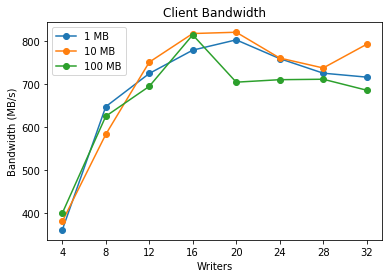

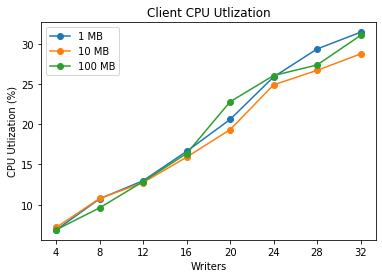

In [22]:
for obj_size in client_band_dic:
    plt.plot(writers_dic[obj_size], client_band_dic[obj_size], marker='o', label=str(obj_size)+' MB')
    plt.title('Client Bandwidth')
    plt.xlabel('Writers')
    plt.ylabel('Bandwidth (MB/s)')
    plt.legend(loc='best')
plt.show()

for obj_size in client_band_dic:    
    plt.plot(writers_dic[obj_size], client_utils_dic[obj_size], marker='o', label=str(obj_size)+' MB')
    plt.title('Client CPU Utlization')
    plt.xlabel('Writers')
    plt.ylabel('CPU Utlization (%)')
    plt.legend(loc='best')
plt.show()